# Introduction

<div class="alert alert-block alert-warning">
<font color=black><br>

**What?** Analysis of the London Rental Property Market

<br></font>
</div>

# Import modules

In [85]:
import os, sys
from sourceCode import RightMoveScraper

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sys.path.append(os.path.dirname(os.getcwd()))

# Checking the object

In [86]:
scraper = RightMoveScraper.RightmoveData
scraper.__init__

<function sourceCode.RightMoveScraper.RightmoveData.__init__(self, url: str, get_floorplans: bool = False)>

# Starting the scrapping

In [87]:
# URL for all London properties to rent, added in last 24hrs:
url = "https://www.rightmove.co.uk/property-to-rent/find.html?searchType=RENT&locationIdentifier=REGION%5E87490&insId=1&radius=0.0&minPrice=&maxPrice=&minBedrooms=&maxBedrooms=&displayPropertyType=&maxDaysSinceAdded=&sortByPriceDescending=&_includeLetAgreed=on&primaryDisplayPropertyType=&secondaryDisplayPropertyType=&oldDisplayPropertyType=&oldPrimaryDisplayPropertyType=&letType=&letFurnishType=&houseFlatShare="

# Scrape rightmove
rmd = scraper(url)

In [88]:
rmd._request(url)

(200,
 b'<!DOCTYPE html>\n<html lang="en-GB" class="is-not-modern property-to-rent channel-based-property-types channel--rent ">\n<head>\n    <meta charset="utf-8">\n    <title>Properties To Rent in London | Rightmove</title>\n    <meta http-equiv="X-UA-Compatible" content="IE=Edge"/>\n    <meta name="viewport" content="width=device-width, shrink-to-fit=no, initial-scale=1.0, user-scalable=no"/>\n    <meta name="format-detection" content="telephone=no"/>\n    <meta name="HandheldFriendly" content="True"/>\n    <meta name="description" content="Flats &amp; Houses To Rent in London - Find properties with Rightmove - the UK&#39;s largest selection of properties."/>\n    <meta name="title" content=""/>\n    <meta name="referrer" content="origin-when-cross-origin"><link rel="preconnect" href="https://media.rightmove.co.uk:443" crossorigin/>\n    <link rel="preconnect" href="//product.rightmove.co.uk" crossorigin/><link rel="shortcut icon" href="/pvw/images/favicons/rebranded/favicon.ico"><l

# Inspecting rmd object

In [64]:
dir(rmd)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_first_page',
 '_get_page',
 '_get_results',
 '_request',
 '_results',
 '_status_code',
 '_url',
 '_validate_url',
 'average_price',
 'get_results',
 'page_count',
 'refresh_data',
 'rent_or_sale',
 'results_count',
 'results_count_display',
 'summary',
 'url']

In [65]:
rmd.summary()

,number_bedrooms,count,mean
0,0,90,1339.133333
1,1,352,1580.815341
2,2,355,2229.985915
3,3,151,3033.046358
4,4,56,3516.553571
5,5,26,6626.884615
6,6,5,5488.200000


In [50]:
rmd.summary(by="postcode")

,postcode,count,mean
0,E14,55,2431.236364
1,SW6,25,2991.680000
2,E1,19,1940.368421
3,E16,19,1834.421053
4,W2,19,3429.000000
...,...,...,...
134,SW13,1,2595.000000
135,SW1A,1,4117.000000
136,SW20,1,2750.000000
137,Sw16,1,1125.000000


In [32]:
print(type(rmd))
print(rmd.results_count)
print(rmd.rent_or_sale)

<class 'rightmove_webscraper.RightmoveData'>
1050
rent


In [31]:
# Get all the results
allScrapedData = rmd._get_results()

In [33]:
allScrapedData.head()

,price,type,address,url,agent_url,postcode,number_bedrooms,search_date
0,2817.0,2 bedroom apartment,Prince Of Wales Drive London SW11,http://www.rightmove.co.uk/properties/11205756...,http://www.rightmove.co.uk/estate-agents/agent...,SW11,2.0,2021-08-31 08:39:28.792809
1,2925.0,1 bedroom apartment,"Hill Street, London, W1J",http://www.rightmove.co.uk/properties/11269540...,http://www.rightmove.co.uk/estate-agents/agent...,W1J,1.0,2021-08-31 08:39:28.792809
2,1746.0,2 bedroom flat,"Hall Place, London, W2",http://www.rightmove.co.uk/properties/11269526...,http://www.rightmove.co.uk/estate-agents/agent...,W2,2.0,2021-08-31 08:39:28.792809
3,1000.0,Studio flat,"Fortess Road, Tufnell Park, NW5",http://www.rightmove.co.uk/properties/11269537...,http://www.rightmove.co.uk/estate-agents/agent...,NW5,0.0,2021-08-31 08:39:28.792809
4,1800.0,1 bedroom flat,"City Pavilion, London , EC1M",http://www.rightmove.co.uk/properties/11269536...,http://www.rightmove.co.uk/estate-agents/agent...,EC1M,1.0,2021-08-31 08:39:28.792809


In [35]:
allScrapedData.describe()

,price,number_bedrooms
count,1047.000000,1040.000000
mean,2216.206304,1.811538
std,1659.984149,1.131006
min,399.000000,0.000000
25%,1400.000000,1.000000
50%,1750.000000,2.000000
75%,2492.000000,2.000000
max,23833.000000,7.000000


# How many listings are there for each type of apartment?

<div class="alert alert-block alert-info">
<font color=black><br>

- E.g. Studios, 1-beds, 2-beds etc.
- if 0 then is classified as studio

<br></font>
</div>

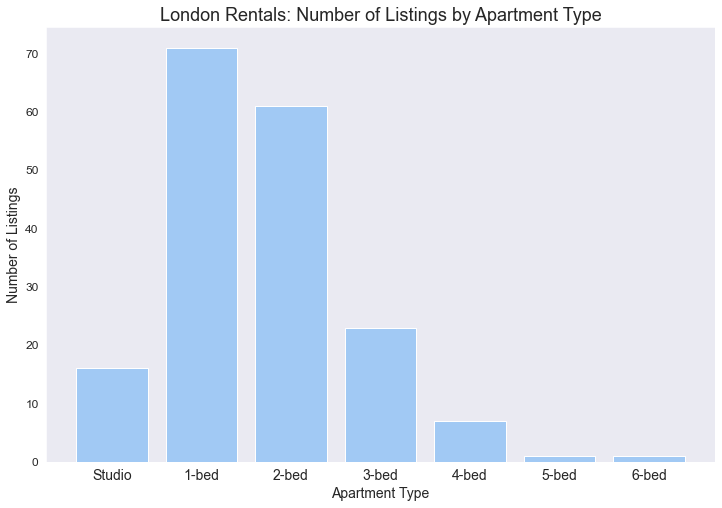

In [2]:
def plot_by_type(rmd: RightmoveData):
    """Bar chart of count of results by number of bedrooms."""
    df = rmd.summary()
    labels = [f"{i}-bed" if i != 0 else "Studio" for i in df["number_bedrooms"]]
    x = df.index
    y = df["count"]
    sns.set_style("dark")
    sns.set_palette(sns.color_palette("pastel"))
    fig, ax = plt.subplots(figsize=(12, 8))
    plt.title("London Rentals: Number of Listings by Apartment Type", size = 18)
    plt.xlabel("Apartment Type", size = 14)
    plt.ylabel("Number of Listings", size = 14)
    plt.xticks(size = 14)
    plt.yticks(size = 12)
    plt.bar(x, y, tick_label=labels)
    plt.show()

plot_by_type(rmd)

# Which postcode areas have the most listings?

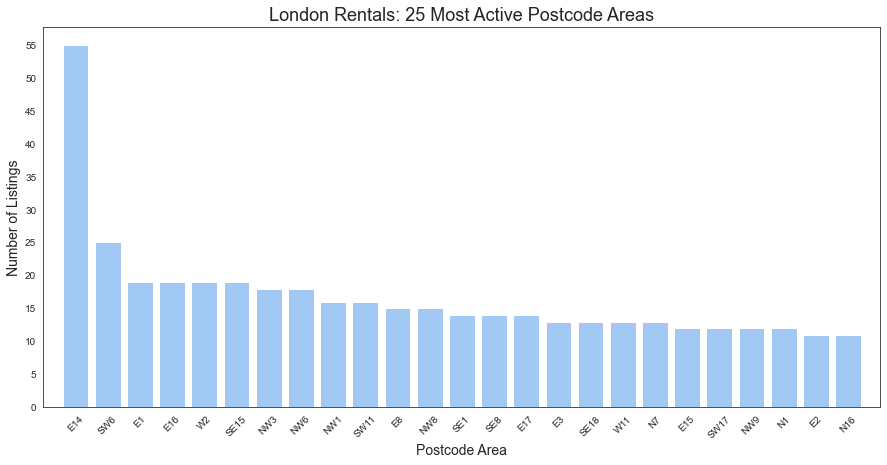

In [36]:
def plot_by_postcode(rmd: RightmoveData, number_to_plot: int = 25):
    """Plot count of results by postcode."""
    df = rmd.summary("postcode")
    df.sort_values(by="count", ascending=False, inplace=True)
    df = df.reset_index(drop=True)[:number_to_plot]
    x, y = df["postcode"], df["count"]
    ymax = ((df["count"].max() // 5) + 1) * 5
    sns.set_palette(sns.color_palette("pastel"))
    fig, ax = plt.subplots(figsize=(15, 7))
    ax.bar(x.index, height=y)
    ax.set_title(f"London Rentals: {number_to_plot} Most Active Postcode Areas", size=18)
    ax.set_xlabel("Postcode Area", size=14)
    ax.set_ylabel("Number of Listings", size=14)
    ax.set_xticks(x.index)
    ax.set_xlim(-1, x.index[-1]+1)
    ax.set_xticklabels(x.values, rotation=45)
    ax.set_yticks(range(0, ymax, 5))
    return fig

f = plot_by_postcode(rmd, number_to_plot=25)

## What are the average prices and number of listings in each London borough?

In [37]:
def get_districts():
    """Load the postcode-district CSV (downloaded from:
    https://www.doogal.co.uk/PostcodeDownloads.php)"""
    df = pd.read_csv("postcode-district.csv", encoding="utf-8")
    return df


def get_inner_outer():
    """Get the inner/outer London classification from CSV."""
    iol = pd.read_csv("./inner_outer_london.csv", header=None)
    iol.rename(columns={0: "borough", 1: "inner_outer"}, inplace=True)
    return iol


def make_dataset(rmd: RightmoveData):
    """Make the dataset for visualization."""
    df = rmd.get_results
    df.dropna(subset=["postcode"], inplace=True)
    
    # Merge in the postcode district (borough):
    postcodes = get_districts()
    
    # Only need the stem of the postcode (e.g. from "N1 6RQ": "N1"):
    postcodes["stem"] = postcodes["Postcode"].str.split(" ").str.get(0)
    postcodes.drop_duplicates(inplace=True)  # Drop duplicate rows.
    
    # Some postcodes cross multiple districts, e.g. N1 is in Hackney 
    # and Islington. To deal with this take a pivot of postcode
    # and District, and keep the District with the highest count.
    postcodes["district_count"] = postcodes.groupby(["stem", "District"])["Postcode"].transform("count")
    postcodes.sort_values(by=["district_count"], ascending=False, inplace=True)
    postcodes.drop_duplicates(subset=["stem"], keep="first", inplace=True)
    df = pd.merge(df, postcodes[["stem", "District"]], how="inner", left_on="postcode", right_on="stem")
    
    # Merge in the Inner/Outer London classification:
    iol = get_inner_outer()
    df = pd.merge(left=df, right=iol, how="inner", left_on="District", right_on="borough")
    
    piv = pd.pivot_table(df, index="borough", values="price", aggfunc=("count", "mean"))
    io = dict(zip(df["borough"], df["inner_outer"]))
    piv["io"] = piv.index.map(io)
    return piv.reset_index()


def good_axis_max(axis_max):
    """Helper function to get nice axis limit for charts."""
    magnitude = 10**(len(str(axis_max))-1)
    max_axis = ((axis_max // magnitude) + 1) * magnitude
    return max_axis


def good_axis_min(axis_min):
    """Helper function to get nice axis limit for charts."""
    magnitude = 10**(len(str(axis_min))-1)
    min_axis = (((axis_min) // magnitude)) * magnitude
    if axis_min == min_axis and axis_min > 0:
        min_axis -= magnitude
    return min_axis


def borough_scatterplot(df, x, y, title, size=7, aspect=1.2):
    """Create a scatter plot of price & number of listings by borough."""
    
    df.sort_values(by = ["mean", "count"])
    df.reset_index(inplace = True, drop = True)
    
    sns.set_style("white")
    scatter = sns.lmplot(x=x, y=y, data=df, fit_reg = False, hue="io",
                         palette = sns.color_palette("bright"),
                         legend=False, size = size, aspect = aspect)
#     scatter.set(xlim = (good_axis_min(df[x].min()), good_axis_max(df[x].max()) + 0.1), 
#                         ylim = (good_axis_min(df[y].min()), good_axis_max(df[y].max())))
        
    # Add data labels:
    labels = df.index
    style = dict(size=10, color='gray')
    for r in range(len(df)):
        x = df.loc[r, "count"]
        y = df.loc[r, "mean"]
        label = df.loc[r, "borough"]
        scatter.ax.text(x, y, label, **style)

    plt.title(title, size=14)
    plt.legend(loc = "upper right", bbox_to_anchor=(1.2, 1), fontsize = "xx-large", )
    plt.xlabel("Property Count", size=14)
    plt.ylabel("Average Price", size=14)
    plt.xticks(size = 14)
    plt.yticks(size = 14)
    plt.show()
    
    
df = make_dataset(rmd)
df.tail()

,borough,count,mean,io
22,Southwark,55,2164.872727,Inner
23,Tower Hamlets,99,2272.242424,Inner
24,Waltham Forest,24,1737.333333,Outer
25,Wandsworth,52,1945.384615,Inner
26,Westminster,77,3820.870130,Inner


/Users/gmura/anaconda3/envs/trainingAI/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


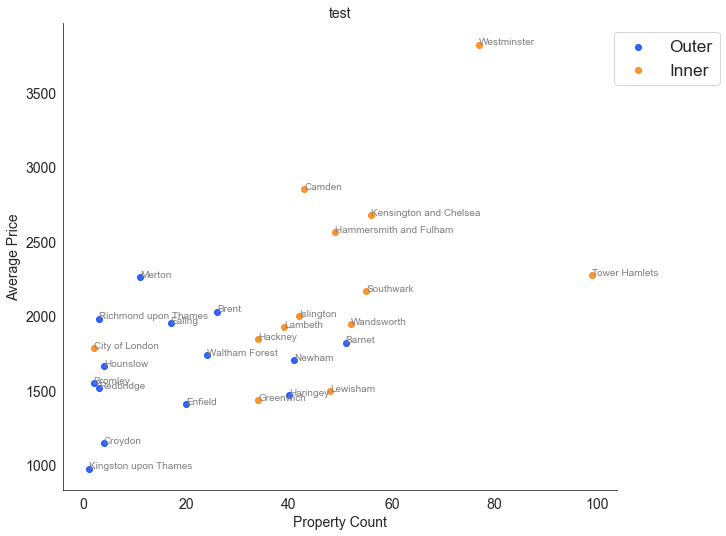

In [38]:
borough_scatterplot(df, "count", "mean", "test")

Wandsworth and Tower Hamlets look like cheaper inner-London boroughs with plentiful listings ...
## Find some promising listings

In [49]:
def cheap_listings(df, number = 10):
    df.sort_values(by = "price", ascending = True, inplace = True)
    df.reset_index(inplace = True, drop = True)
    for l in range(number):
        print("£{} - {}" .format(df.loc[l, "price"], df.loc[l, "url"]))
        
cheap_listings(allScrapedData, number = 5)

£399.0 - http://www.rightmove.co.uk/properties/112675355#/?channel=RES_LET
£399.0 - http://www.rightmove.co.uk/properties/112660439#/?channel=RES_LET
£520.0 - http://www.rightmove.co.uk/properties/112605176#/?channel=RES_LET
£549.0 - http://www.rightmove.co.uk/properties/112660457#/?channel=RES_LET
£599.0 - http://www.rightmove.co.uk/properties/112302209#/?channel=RES_LET


# References

<div class="alert alert-block alert-warning">
<font color=black><br>

- https://github.com/toby-p/rightmove_webscraper.py

<br></font>
</div>